# <center>Pydata Yerevan 2022 : How to use Pandas Efficiently </center>

### Github Repository :  <a href="https://bit.ly/3QeAJ3e">bit.ly/3QeAJ3e</a>
### Google Colab :  <a href ="http://bit.ly/3dgwqpr"> bit.ly/3dgwqpr </a>

We will be using the following dataset for this tutorial :<br>
- IMDB top 1000 Movie Dataset<br> https://www.kaggle.com/datasets/mysarahmadbhat/imdb-top-1000-movies
- Bank Marketing Dataset (UCI) https://archive.ics.uci.edu/ml/datasets/bank+marketing <br>
- Bike Sharing dataset (Kaggle) https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset

While you are waiting for the tutorial to start, you can go through above link to download dataset and Notebook :<br>
N.B. : If you do not have Python installed on your system, you can use Google Colab to run the notebook.


### Why pandas? 
-  easy to use 
-  easy to learn.
- it is fast 
- it is a powerful data analysis toolkit
- it is open source
- it is supported by many developers (~3k)


### PART 1 :Pandas Big Picture



<img src="img/Excel_Vs_Pandas.jpg" width="550" height="200" style ="float:center" >

### Two building blocks of pandas are Series and DataFrame
- Series: A 1D labeled data structure with rows.
- DataFrame: A 2D labeled data structure with columns and rows.


In [1]:
#import required libraries
import pandas as pd
import numpy as np


In [2]:
# read imdb dataset
imdb = pd.read_csv('data/imdb_1000.csv')
imdb.head()



,Name,Year,duration,Rating,Meta_score,Votes,Director,cast,Gross,genre
0,The Shawshank Redemption,1994,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34,Drama
1,The Godfather,1972,175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97,Crime
2,The Dark Knight,2008,152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,Action
3,The Godfather: Part II,1974,202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30,Crime
4,12 Angry Men,1957,96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36,Crime


In [3]:
# check the type of the dataset
type(imdb)

pandas.core.frame.DataFrame

In [4]:
# check the type of a column
type(imdb.Year)


pandas.core.series.Series

### some of the basic operation by Pandas


In [5]:
# print some basic information about the dataset
print(imdb.duration.max())
print(imdb.duration.min())
print(imdb.duration.mean())

321
45
123.157


### Notes:
#### 1- Ask Questions and Answer them with Data by Pandas insetad of Jumping to the analysis without knowing the data  <br>
#### 2- Relation does not mean causation. Here we just find the relationship is present in the data.(Causation needs more domain knowledge)  <br>
#### 3- There more than one way to do something in Pandas. <br>
#### 4- Data is not always clean. We need to clean it before analysis. <br>
Q1 : What is the trend of Years in which movies are released? <br>
Q2 : Which Genre had the highest number of movies among top 1000 movies dataset? <br>
Q3 : What is the distribution of Duration (In every 10 minutes) in the top 1000 movies? <br>
Q4 : what is the average duration of each genre?    <br>
Q5 : Was there an increase of Votes over the time ? <br
Q6 : For each year what was the average rating and the maximum of Meta score? <br>


#### Practice 1:
How many of movies got rating between 7.5 and 8.5? (Hint:use value_counts() method) <br>
What is trend of Gross Earning over the years? (Hint: use groupby() method) <br>
what is the distibution of meta score in every 10 points? (Hint: use cut() method) <br>
How many cast are there in each movei? (Hint: use apply() method) <br>

<AxesSubplot:>

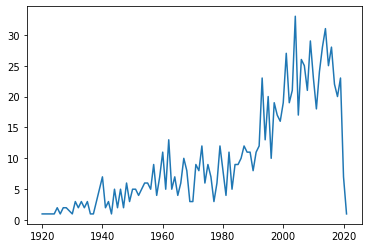

In [12]:
#What is the trend of Years in which movies are released? <br>
imdb.groupby('Year').Name.count().plot()
imdb.Year.value_counts().sort_index().plot()



In [20]:
# Q1 : Which Genre had the highest number of movies among top 1000 movies dataset? <br>
imdb.genre.value_counts()



Drama        292
Action       169
Comedy       154
Crime        111
Biography     86
Animation     83
Adventure     70
Horror        12
Mystery       11
Western        4
Fantasy        3
Film-Noir      2
Family         2
Thriller       1
Name: genre, dtype: int64

<AxesSubplot:>

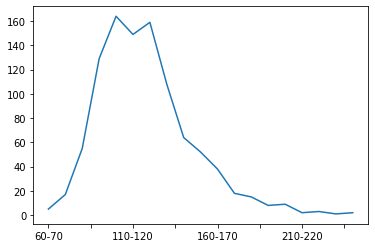

In [25]:
# What is the distribution of Duration (In every 10 minutes) in the top 1000 movies?
# way 1:
bins = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
labels = ['60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200','200-210','210-220','220-230','230-240','240-250']
imdb['duration_group'] = pd.cut(imdb.duration,bins=bins , labels=labels)
imdb.duration_group.value_counts().sort_index().plot()


<AxesSubplot:>

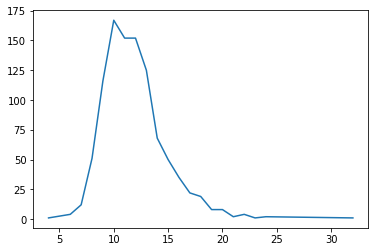

In [24]:
# way 2: using math function
imdb['duration_group'] = imdb.duration // 10
imdb.duration_group.value_counts().sort_index().plot()


<AxesSubplot:xlabel='genre'>

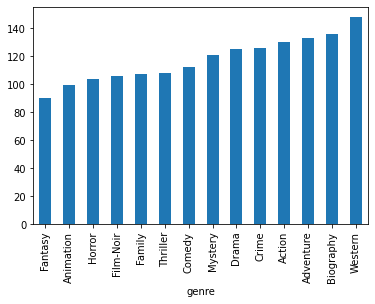

In [29]:
# what is the average duration of each genre?
imdb.groupby('genre').duration.mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Year'>

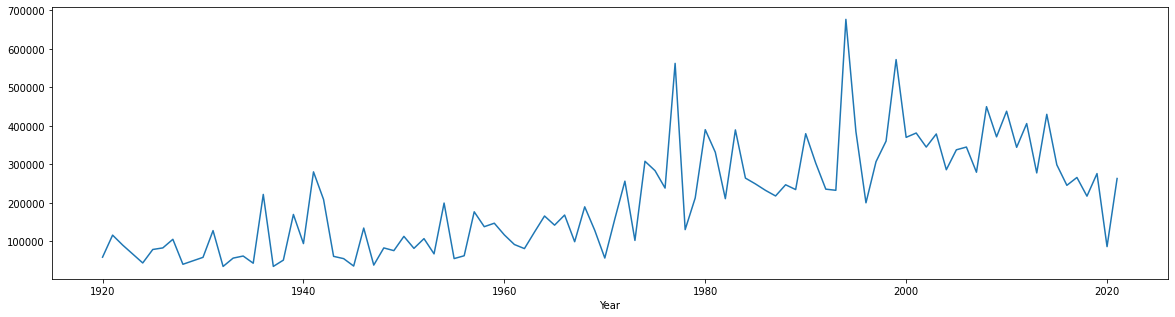

In [34]:
# Q5 : Was there an increase of Votes over the time ? <br
imdb.groupby('Year').Votes.mean().plot(figsize=(20,5))


In [37]:
# Q6 : For each year what was the average rating and the maximum of Meta score? <br>
imdb.groupby('Year').agg({'Rating':'mean','Votes':'max'})


,Rating,Votes
Year,,
1920,8.100000,58203
1921,8.300000,115516
1922,7.900000,89728
1924,8.200000,43176
1925,8.100000,102657
...,...,...
2017,7.886364,660302
2018,8.015000,865406
2019,7.982609,981508


In [38]:
# Q6 : For each year what was the average rating and the maximum of Meta score?(with Pivot table) <br>
imdb.pivot_table(index='Year',values=['Rating','Votes'],aggfunc={'Rating':'mean','Votes':'max'})

,Rating,Votes
Year,,
1920,8.100000,58203
1921,8.300000,115516
1922,7.900000,89728
1924,8.200000,43176
1925,8.100000,102657
...,...,...
2017,7.886364,660302
2018,8.015000,865406
2019,7.982609,981508


In [ ]:
# Practice:1
# How many of movies got rating between 7.5 and 8.5? (Hint:use value_counts() method) <br>
# What is trend of Gross Earning over the years? (Hint: use groupby() method) <br>
# what is the distibution of meta score in every 10 points? (Hint: use cut() method) <br>
# How many cast are there in each movei? (Hint: use apply() method) <br>



### Part II : How to use Pandas More effiently

### 95% of people use this kind of code style but only 5% of people know how to use it more efficiently.!

<img src="img/Screenshot1.jpg" width="750" height="500" style ="float:middle" ><br>
<br>
<img src="img/Screenshot2.jpg" width="750" height="500" style ="float:left" >


### Use chaining instead of classic coding
 ### what is Chainning?
 Chaining allows you to express the idea of data flowing through a pipeline almost 1-to-1 into your code, making your code more readable both for yourself and for others. <br>
 
#### 1- Benefit of usnig chaining in your codes
- It is more readable and understandable
- It is more efficient and can save you a lot of time
- It is more pythonic 
- It is more fun!


In [40]:
# read bank dataset
bank = pd.read_csv('data/bank-full.csv',sep=';')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


nput variables:<br>
**bank client data:**<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**   <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

**social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

<AxesSubplot:xlabel='job'>

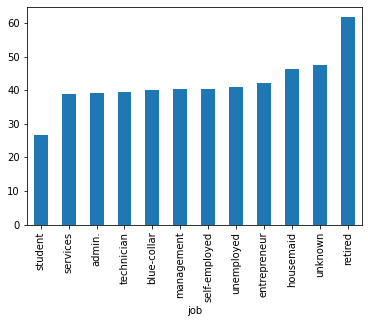

In [48]:
# sample of using chained methods to get the result in differnt lines seprated by . 
# What is the average age of each job
(bank
.groupby('job')
.age
.mean()
.sort_values()
.plot(kind='bar')
)

# Again Ask Questions and Answer them with Data by Pandas
Q1 : What is the distribution of age(in every decade in data set? <br>
Q2 : Is there relation between age group and balance? <br>
Q3 : Is there relation between marital status and balance? <br>
Q4 : Is there relation between education and balance? <br>
Q5 : Is there relation between occupation and balance? <br>
Q6 : Which job had more default? <br>
Q7 : Which education level had more balance? <br>



In [49]:
# clean the dataset function
def clean_df (df):
    return (df
    .replace('unknown',np.nan)
    .replace('yes',1)
    .replace('no',0)
    )

bank = clean_df(bank)
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [52]:
# get null values
bank.isnull().sum() *100 / bank.shape[0]


age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [53]:
# clean the dataset function with fillna and assign
def clean_df(df):
      return (df
    .replace('unknown',np.nan)
    .replace('yes',1)
    .replace('no',0)
    .assign(
        job = lambda x:x.job.fillna(x.job.mode()[0])
        ,education = lambda x:x.education.fillna(x.education.mode()[0])
        ,contact = lambda x:x.contact.fillna(x.contact.mode()[0]))
    .drop('poutcome',axis=1)

    )
    
    
bank = clean_df(bank)    
bank.head()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0


<AxesSubplot:xlabel='education'>

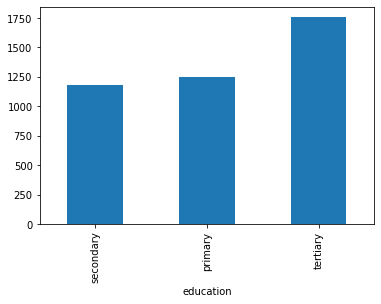

In [70]:
# Answer the questions with the cleaned dataset and chained methods:
bins=[0,20,30,40,50,60,70,80,90,100]
labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
(bank
.assign(age_group=lambda x :pd.cut(x.age,labels=labels,bins=bins))
# Q1 : What is the distribution of age(in every decade in data set? <br>
#  .age_group.value_counts()
#  .sort_index()
#  .plot(kind='bar')       

# Q2 : What is the relation between age group and balance? <br>
# .groupby('age_group')
# .balance
# .mean()
# .plot(kind='bar')

#Q3 : What is the relation between marital status and balance? <br>
# .groupby('marital')
# .balance
# .mean()
# .plot(kind='bar')



# Q4 : What is the relation between education and balance? <br>
# .groupby('education')
# .balance
# .mean()
# .plot(kind='bar')


# Q5 : What is the relation between job and balance? <br>
# .groupby('job')
# .balance
# .mean()
# .sort_values()
# .plot(kind='bar')

# Q6 :  Which job had more default? <br>
# .groupby('job')
# .default
# .mean()
# .sort_values()
# .plot(kind='bar')


# Q7 : Which education level had more default? <br>
.groupby('education')
.balance
.mean()
.sort_values()
.plot(kind='bar')

)


### USE QUERY INSIDE PANDAS
when we have a lot of conditions, we can use query method to make our code more readable and efficient. <br>

### Q1: select rows  with balance between 10000 and 20000

In [74]:
# Q1: select rows  with balance between 10000 and 20000
(bank
.query('balance > 10000 and balance < 20000')
# .loc[(bank.balance >10000) & (bank.balance < 20000),: ]

)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
34,51,management,married,tertiary,0,10635,1,0,cellular,5,may,336,1,-1,0,0
69,35,blue-collar,single,secondary,0,12223,1,1,cellular,5,may,177,1,-1,0,0
1236,34,entrepreneur,married,tertiary,0,10350,1,0,cellular,8,may,187,3,-1,0,0
2065,55,retired,married,secondary,0,18722,1,0,cellular,12,may,128,2,-1,0,0
2479,59,management,divorced,primary,0,13308,1,0,cellular,13,may,131,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,0,11862,0,0,cellular,21,oct,549,2,238,13,1
45097,61,self-employed,married,tertiary,0,10861,0,0,cellular,25,oct,225,1,91,5,1
45098,44,technician,single,secondary,0,11115,0,0,cellular,25,oct,189,1,185,4,0
45118,78,retired,married,primary,0,14204,0,0,cellular,26,oct,150,1,183,1,0


In [83]:
# Select rows with balance between 10000 and 20000 and age between 30 and 40 or job is admin or management
(bank
.query('balance > 10000 and balance < 20000 or job in ("admin.","management")')
# .loc[((bank.balance >10000) & (bank.balance < 20000)) or bank.job in ("admin.","management"),: ]

)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
## Parctice: Select rows with age between 30 and 40 and job is admin or management and had default

#### Simplify Join in Pandas

<img src='img/SQL_JOINS_V2.png'>

#### Concat
#### Merge
#### Join

In [84]:
# read Bike Sharing Dataset
bike = pd.read_csv('data/Bike_demand.csv')
bike.head()


,dteday,registered,cnt
0,01-01-2018,654,985
1,02-01-2018,670,801
2,03-01-2018,1229,1349
3,04-01-2018,1454,1562
4,05-01-2018,1518,1600


In [85]:
# read Calendar Dataset
calendar = pd.read_csv('data/Calendar_data.csv')
calendar.head()


,dteday,season,yr,mnth,holiday,weekday,workingday
0,01-01-2018,1,0,1,0,6,0
1,02-01-2018,1,0,1,0,0,0
2,03-01-2018,1,0,1,0,1,1
3,04-01-2018,1,0,1,0,2,1
4,05-01-2018,1,0,1,0,3,1


In [86]:
# read Weather Dataset
weather = pd.read_csv('data/weather_data.csv')
weather.head()


,dteday,weathersit,temp,atemp,hum,windspeed
0,01-01-2018,2,14.110847,18.18125,80.5833,10.749882
1,02-01-2018,2,14.902598,17.68695,69.6087,16.652113
2,03-01-2018,1,8.050924,9.47025,43.7273,16.636703
3,04-01-2018,1,8.200000,10.60610,59.0435,10.739832
4,05-01-2018,1,9.305237,11.46350,43.6957,12.522300


### use Merge to combine two dataframes Then: <br>

Answer the following questions: <br>
Q1 : What is the trend of bike demand over years? <br>
Q2 : Which month(in the whole dataset) had the highest demand for Bikes? <br>
Practice 2 : Is there any relation between temprature and Bike demand? <br>
Practice 3 : Does Holiday affect demand or not? <br>
Practice 4 : Does weathersit affect demand or not? <br>

# Q1 : What is the trend of bike demand over years? 


<AxesSubplot:xlabel='temp', ylabel='cnt'>

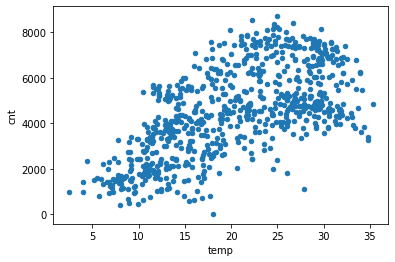

In [114]:
# Merge Bike_demand and Calendar_date and Weather_data on date
(bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')

# Q1 : What is the trend of bike demand over years? 
.assign(date = lambda x:pd.to_datetime(x.dteday ,format="%d-%m-%Y")
 ,month = lambda x:x.date.dt.to_period('M')
 )
# .dtypes
# .groupby('month')
# .cnt
# .mean()
# .plot(figsize =(20,5))

 

#Q1 : Which month had the highest demand for Bikes? <br>
# .groupby('month')
# .cnt
# .max()
# .sort_values(ascending= False).index[0]

# .plot(figsize =(20,5))

 
# Practice 2 : Is there any relation between temprature and Bike demand? <br>
# .plot(x='temp',y='cnt',kind='scatter')

 
# Practice 3 : Does Holiday affect demand or not <br>
 
# Practice 4 : Does weathersit affect demand or not? <br>
 
)

### Use concat to combine two dataframes

In [119]:
# Create new dataframe for 2018 data
bike_2018 = (bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')

# Q1 : What is the trend of bike demand over years? 
.assign(date = lambda x:pd.to_datetime(x.dteday ,format="%d-%m-%Y"))
.query('date.dt.year == 2018')

)
bike_2018.head()

,dteday,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,date
0,01-01-2018,654,985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,2018-01-01
1,02-01-2018,670,801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,2018-01-02
2,03-01-2018,1229,1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,2018-01-03
3,04-01-2018,1454,1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,2018-01-04
4,05-01-2018,1518,1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,2018-01-05


In [120]:
# Create new dataframe for 2019 data
bike_2019 = (bike
.merge(calendar,on='dteday')
.merge(weather,on='dteday')

# Q1 : What is the trend of bike demand over years? 
.assign(date = lambda x:pd.to_datetime(x.dteday ,format="%d-%m-%Y"))
.query('date.dt.year == 2019')

)
bike_2019.head()

,dteday,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,date
365,01-01-2019,1608,2294,1,1,1,0,0,0,1,15.170000,18.78105,69.2500,12.875189,2019-01-01
366,02-01-2019,1707,1951,1,1,1,1,1,0,1,11.194763,12.61520,38.1304,22.087555,2019-01-02
367,03-01-2019,2147,2236,1,1,1,0,2,1,1,6.150000,6.31375,44.1250,24.499957,2019-01-03
368,04-01-2019,2273,2368,1,1,1,0,3,1,2,4.407500,5.96685,41.4583,12.374900,2019-01-04
369,05-01-2019,3132,3272,1,1,1,0,4,1,1,10.899153,13.92060,52.4167,8.709129,2019-01-05


In [123]:
# Concat 2018 and 2019 data into one dataframe
print(bike_2018.shape)
print(bike_2019.shape)

bike_total = pd.concat([bike_2018,bike_2019],axis=0)
print(bike_total.shape)

 

(365, 15)
(365, 15)
(730, 15)


### Other useful methods
Here I will bring some useful methods that I use them in my daily work. <br>

- isin() -->  isin() method is used to filter data based on a condition. <br>
- str.contains() --> str.contains() method is used to filter data based on a condition. <br>
- np.where() --> np.where() method is used to filter data based on a condition. <br>
- apply() --> apply() method is used to apply a function on a column. <br>
- map() --> map() method is used to map a value to another value. <br>
- unique() --> unique() method is used to get unique values in a column. <br>
- nunique() --> nunique() method is used to get number of unique values in a column. <br>
- value_counts() --> value_counts() method is used to get number of unique values in a column. <br>
- sort_values() --> sort_values() method is used to sort values in a column. <br>
- sort_index() --> sort_index() method is used to sort index in a column. <br>
- drop_duplicates() --> drop_duplicates() method is used to drop duplicates in a column. <br>
- dropna() --> dropna() method is used to drop null values in a column. <br>
- fillna() --> fillna() method is used to fill null values in a column. <br>
- loc,iloc --> loc,iloc method is used to filter data based on a condition. <br>
...

In [132]:

(bike
.merge(calendar, on='dteday')
.merge(weather, on='dteday')
.assign(date = lambda df_: pd.to_datetime(df_.dteday, format='%d-%m-%Y')
#np.where sample
,season_string = lambda df_: np.where(df_.season == 1, 'spring', np.where(df_.season == 2, 'summer', np.where(df_.season == 3, 'fall', 'winter')))
)

#isin() sample
# select month Jan,feb , march
# Bike_demand_new.loc[Bike_demand_new.date.dt.month.isin((1,2,3)),:]

# unique() sample
# .weathersit.unique()

#nunique() sample
.weathersit.nunique()
)



3